<a href="https://colab.research.google.com/github/HajraRizwan/Machine-Learning-Algorithms/blob/main/Machine_Learning_Algoritm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simple Linear Regression**

Shape of X_train =  (159, 1)
Shape of y_train =  (159,)
Shape of X_test =  (40, 1)
Shape of y_test =  (40,)
coefficients [169.81961679]
intercept -4535.38595559635


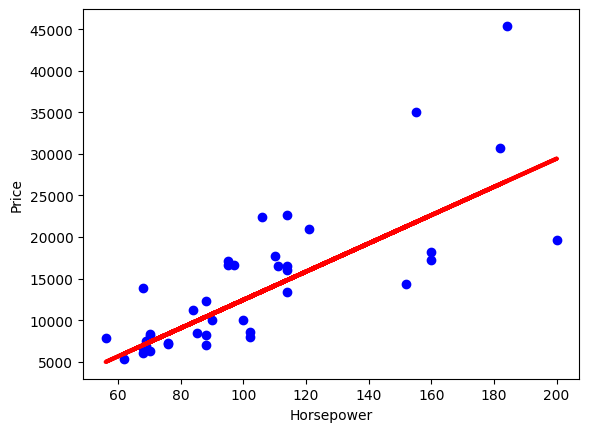

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('/content/drive/MyDrive/ML uni/Automobile_data (1) (1).csv')

df.head()

variable=df[["horsepower","price"]]

# 1. Replace '?' with NaN:
df.replace('?', np.nan, inplace=True)

# 2. Drop rows with NaN values in 'horsepower' and 'price':
df.dropna(subset=['horsepower', 'price'], inplace=True)

# 3. Convert 'horsepower' and 'price' columns to numeric:
df['horsepower'] = pd.to_numeric(df['horsepower'])
df['price'] = pd.to_numeric(df['price'])

# 4. Recreate X and y with the cleaned data:
variable = df[['horsepower', 'price']]
X = np.asanyarray(variable.drop('price', axis=1))
y = np.asanyarray(df['price'])


X = np.asanyarray(variable.drop('price', axis=1) )
y = np.asanyarray(df['price'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

from sklearn import linear_model
regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)

print("coefficients", regr.coef_)
print("intercept", regr.intercept_)

test_x = np.asanyarray(variable.drop('price', axis=1) )
test_y = np.asanyarray(df['price'])

test_x=np.asanyarray(X_test)
test_y=np.asanyarray(y_test)

test_y_pred = regr.predict(test_x)

# prompt: generate plt

import matplotlib.pyplot as plt

plt.scatter(test_x, test_y,  color='blue')
plt.plot(test_x, test_y_pred, color='red', linewidth=3)
plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.show()

# **Multiple Linear Regression**

Shape of X_train =  (156, 2)
Shape of y_train =  (156,)
Shape of X_test =  (39, 2)
Shape of y_test =  (39,)
coefficients [169.7387521  328.14620792]
intercept -5424.024229287397


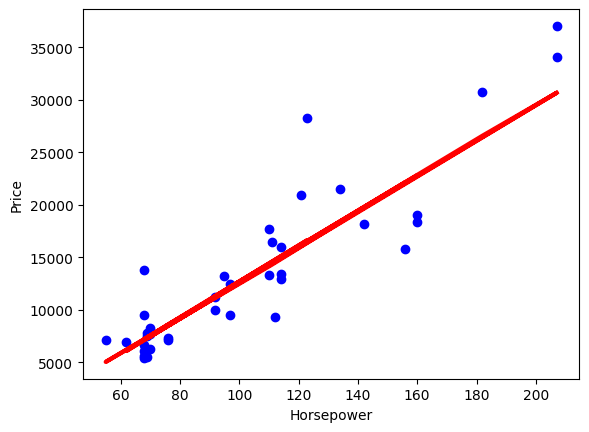

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/ML uni/Automobile_data (1) (1).csv')

# 1. Replace '?' with NaN:
df.replace('?', np.nan, inplace=True)

# 2. Drop rows with NaN values in 'horsepower', 'engine_size', and 'price':
df.dropna(subset=['horsepower', 'stroke', 'price'], inplace=True)

# 3. Convert 'horsepower', 'engine_size', and 'price' columns to numeric:
df['horsepower'] = pd.to_numeric(df['horsepower'])
df['engine_size'] = pd.to_numeric(df['stroke'])
df['price'] = pd.to_numeric(df['price'])

# 4. Recreate X and y with the cleaned data (multiple variables for X):
variable = df[['horsepower', 'stroke', 'price']]
X = np.asanyarray(variable.drop('price', axis=1))
y = np.asanyarray(df['price'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

from sklearn import linear_model
regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)

print("coefficients", regr.coef_)
print("intercept", regr.intercept_)

test_x = np.asanyarray(X_test)
test_y = np.asanyarray(y_test)

test_y_pred = regr.predict(test_x)

# Visualize the results (not possible for multiple variables, but we'll use horsepower here for demonstration):
plt.scatter(test_x[:, 0], test_y, color='blue')  # Using the first feature (horsepower)
plt.plot(test_x[:, 0], test_y_pred, color='red', linewidth=3)
plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.show()


# **Logistic Regression**

In [ ]:
# Import required libraries
import pandas as pd               # For data manipulation and analysis
import numpy as np                # For numerical operations and arrays
from sklearn.model_selection import train_test_split # To split data into training and testing
from sklearn.preprocessing import StandardScaler     # For scaling features
from sklearn.linear_model import LogisticRegression  # Logistic regression model
from sklearn.metrics import classification_report, jaccard_score # For model evaluation

# Downloads the churn dataset and saves it locally as 'ChurnData.csv'.
!wget -O ChurnData.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv

# Load dataset
churn_df = pd.read_csv("ChurnData.csv")  # Load data from CSV
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'churn']]  # Select relevant columns
churn_df['churn'] = churn_df['churn'].astype('int')  # Ensure target variable is integer

# Feature and target variable
X = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']]  # Features
y = churn_df['churn']  # Target

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (Standardize)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
logistic_model = LogisticRegression(C=0.01, solver='liblinear')  # Initialize model
logistic_model.fit(X_train, y_train)  # Train the model

# Predict probabilities and classes
yhat_class = logistic_model.predict(X_test)  # Predicted class labels (0 or 1)
yhat_prob = logistic_model.predict_proba(X_test)[:, 1]  # Predicted probabilities for class 1

# Evaluate model
print("Jaccard Index:", jaccard_score(y_test, yhat_class))
print("Classification Report:\n", classification_report(y_test, yhat_class))


--2024-12-10 15:33:15--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35943 (35K) [text/csv]
Saving to: ‘ChurnData.csv’

ChurnData.csv       100%[===================>]  35.10K  --.-KB/s    in 0.06s   

2024-12-10 15:33:16 (604 KB/s) - ‘ChurnData.csv’ saved [35943/35943]

Jaccard Index: 0.4666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.81      0.86        31
           1       0.54      0.78      0.64         9

    accuracy                 

# **Linear Regreesion**

Mean Squared Error: 45714012.5238557


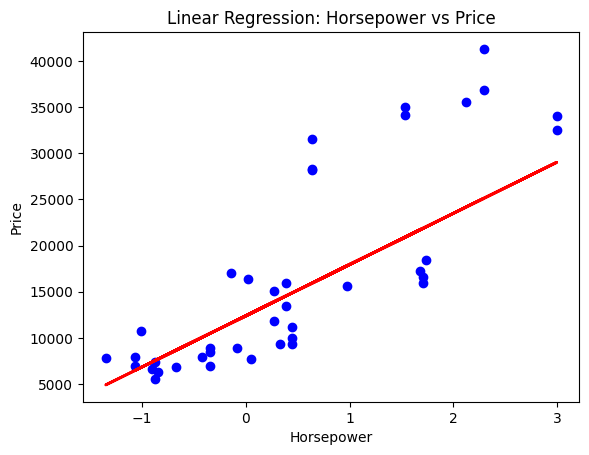

In [ ]:
# Import required libraries
import pandas as pd               # For data manipulation and analysis
import numpy as np                # For numerical operations and arrays
from sklearn.model_selection import train_test_split # To split data into training and testing
from sklearn.preprocessing import StandardScaler     # For scaling features
from sklearn.linear_model import LinearRegression    # Linear regression model
from sklearn.metrics import mean_squared_error       # For model evaluation
import matplotlib.pyplot as plt                      # For visualization

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/ML uni/Automobile_data (1) (1).csv') # Load data from CSV
df.replace('?', np.nan, inplace=True)    # Replace '?' with NaN
df.dropna(subset=['horsepower', 'price'], inplace=True)  # Drop rows with missing values
df['horsepower'] = pd.to_numeric(df['horsepower'])  # Convert 'horsepower' to numeric
df['price'] = pd.to_numeric(df['price'])           # Convert 'price' to numeric

# Feature and target variable
X = df[['horsepower']]  # Features
y = df['price']         # Target

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (Standardize)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Linear Regression model
linear_model = LinearRegression()  # Initialize model
linear_model.fit(X_train, y_train)  # Train the model

# Predict continuous values
yhat = linear_model.predict(X_test)  # Predicted prices

# Evaluate model
mse = mean_squared_error(y_test, yhat)
print("Mean Squared Error:", mse)

# Visualize predictions
plt.scatter(X_test, y_test, color='blue')  # Scatter plot of actual values
plt.plot(X_test, yhat, color='red', linewidth=2)  # Line plot of predictions
plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.title("Linear Regression: Horsepower vs Price")
plt.show()


# **KNN**

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target flower_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa  
Accuracy: 1.0


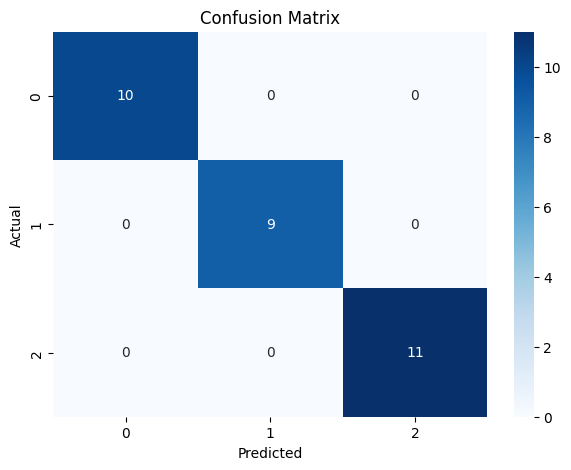

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Predicted Class for Example Input: [2]


In [ ]:
# Import required libraries
import pandas as pd                        # For data manipulation
import numpy as np                         # For numerical operations
from sklearn.model_selection import train_test_split # To split data into training and testing sets
from sklearn.preprocessing import StandardScaler     # For scaling features
from sklearn.neighbors import KNeighborsClassifier   # For KNN classification
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # For evaluation metrics
import seaborn as sns                       # For visualization
import matplotlib.pyplot as plt             # For plotting

# Load the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

# Create a DataFrame from the dataset
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])  # Add flower names for readability

# Display the first few rows of the dataset
print(df.head())

# Features (X) and target variable (y)
X = df[iris.feature_names]  # Feature columns
y = df['target']            # Target column

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features for better KNN performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # Initialize the KNN classifier with 5 neighbors
knn.fit(X_train, y_train)  # Fit the model using training data

# Make predictions
y_pred = knn.predict(X_test)  # Predicted classes for test data
y_pred_proba = knn.predict_proba(X_test)  # Predicted probabilities for test data

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)  # Print the accuracy score

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")  # Heatmap for confusion matrix
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Example prediction
example_prediction = knn.predict([[4.8, 3.0, 1.5, 0.3]])  # Predict class for a new sample
print("Predicted Class for Example Input:", example_prediction)


# **K-Means Clustering**

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
0           1   19                  15                      39         True
1           2   21                  15                      81         True
2           3   20                  16                       6        False
3           4   23                  16                      77        False
4           5   31                  17                      40        False
   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male  \
0           1   19                  15 

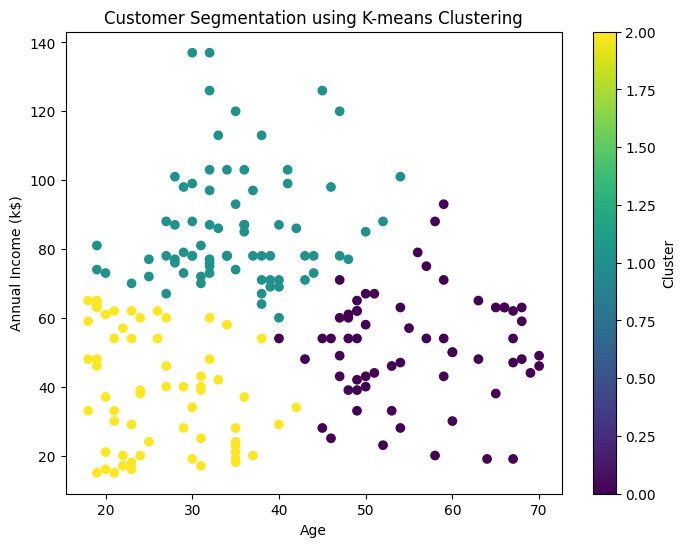

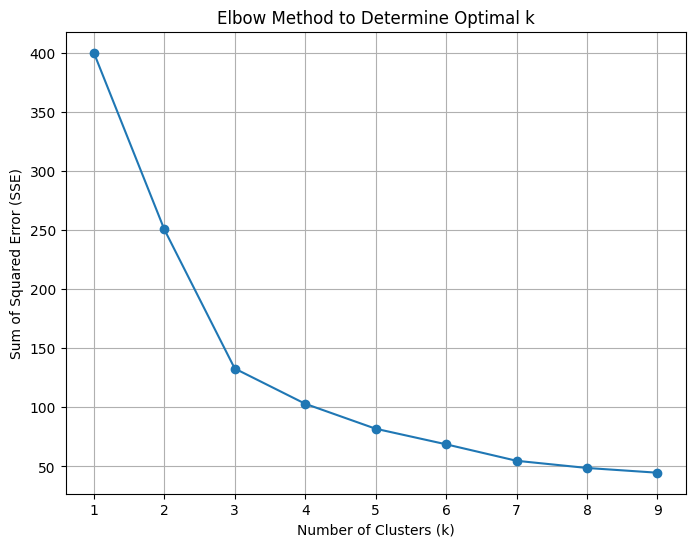

     CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male  \
0             1   19                  15                      39         True   
1             2   21                  15                      81         True   
2             3   20                  16                       6        False   
3             4   23                  16                      77        False   
4             5   31                  17                      40        False   
..          ...  ...                 ...                     ...          ...   
195         196   35                 120                      79        False   
196         197   45                 126                      28        False   
197         198   32                 126                      74         True   
198         199   32                 137                      18         True   
199         200   30                 137                      83         True   

     Cluster  
0          2

In [ ]:
# Import necessary libraries
from google.colab import drive  # To access Google Drive
import pandas as pd             # For data manipulation
import numpy as np              # For numerical computations
import matplotlib.pyplot as plt # For visualizations
from sklearn.cluster import KMeans  # For K-means clustering
from sklearn.preprocessing import StandardScaler  # For data standardization

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/ML uni/Mall_Customers.csv')

# Display the first few rows of the dataset
print(df.head())

# Convert categorical 'Gender' to numerical values using one-hot encoding
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Display the updated dataset
print(df.head())

# Select features for clustering
features = df[['Age', 'Annual Income (k$)']]  # Choosing only relevant columns for clustering

# Standardize the features for better clustering performance
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Train the KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)  # Define 3 clusters
kmeans.fit(scaled_features)

# Add cluster labels to the original dataset
df['Cluster'] = kmeans.labels_
print(df.head(10))  # Display the first 10 rows with cluster assignments

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Annual Income (k$)'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Customer Segmentation using K-means Clustering')
plt.colorbar(label='Cluster')
plt.show()

# Elbow method to find the optimal number of clusters
sse = []  # Sum of squared errors for each value of k
k_rng = range(1, 10)  # Range of k to test
for k in k_rng:
    km = KMeans(n_clusters=k, random_state=42)  # Initialize KMeans with k clusters
    km.fit(scaled_features)
    sse.append(km.inertia_)  # Append the inertia (SSE)

# Plot the SSE for each value of k
plt.figure(figsize=(8, 6))
plt.plot(k_rng, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.title('Elbow Method to Determine Optimal k')
plt.grid()
plt.show()

# Display the clustered data
print(df)


# **Naive Bayes Classification**

In [ ]:
# Import necessary libraries
import pandas as pd  # For data manipulation
from sklearn.feature_extraction.text import CountVectorizer  # To convert text to feature vectors
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes classifier
from sklearn.metrics import accuracy_score, classification_report  # For evaluation

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/ML uni/spam (2).csv')  # Replace with your file path

# Rename columns for clarity
df.rename(columns={'Category': 'Label', 'Message': 'Text'}, inplace=True)

# Convert text data into numerical feature vectors using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')  # Removes stop words
X = vectorizer.fit_transform(df['Text'])  # Feature matrix
y = df['Label']  # Labels (spam or ham)

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Train set size: {X_train.shape[0]}')
print(f'Test set size: {X_test.shape[0]}')

# Initialize and train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)  # Train using training data

# Predict labels for the test set
y_pred = model.predict(X_test)

# Calculate and display accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

# Display detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Train set size: 4457
Test set size: 1115
Accuracy: 98.12%
Classification Report:
               precision    recall  f1-score   support

         ham       0.99      0.99      0.99       966
        spam       0.92      0.95      0.93       149

    accuracy                           0.98      1115
   macro avg       0.95      0.97      0.96      1115
weighted avg       0.98      0.98      0.98      1115



# **Decision Tree Classifier**

In [ ]:
import pandas as pd  # For data manipulation and analysis.

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/ML uni/salaries.csv")  # Reads the dataset into a pandas DataFrame.

# Display the first 5 rows of the dataset
df.head()

# Drops the target column ('salary_more_then_100k') to keep only input features.
inputs = df.drop('salary_more_then_100k', axis='columns')

# The target variable we want to predict.
target = df['salary_more_then_100k']

from sklearn.preprocessing import LabelEncoder  # For converting text data to numerical form.

# Initialize label encoders for each categorical column.
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

# Transform the categorical columns into numerical values.
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])

# Display the DataFrame with new numerical columns.
inputs

# Remove the original text columns since they have been converted to numerical values.
inputs_n = inputs.drop(['company', 'job', 'degree'], axis='columns')

# Display the cleaned DataFrame with only numerical columns.
inputs_n

from sklearn import tree  # Importing decision tree classifier.

# Initialize the decision tree classifier.
model = tree.DecisionTreeClassifier()

# Train the model using the input features and target variable.
model.fit(inputs_n, target)

# Check the accuracy of the model on the training data.
print(f'Model Accuracy: {model.score(inputs_n, target)}')

# Predict whether a person with specific features has a salary > $100k.
# Example 1: company=2, job=1, degree=0 (These are numerical representations of the respective categories).
prediction1 = model.predict([[2, 1, 0]])
print(f'Prediction 1: {prediction1}')  # Output prediction (0 or 1)

# Example 2: company=2, job=1, degree=1
prediction2 = model.predict([[2, 1, 1]])
print(f'Prediction 2: {prediction2}')  # Output prediction (0 or 1)


Model Accuracy: 1.0
Prediction 1: [0]
Prediction 2: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# **1. Imports for All Algorithms**
# Import libraries required for all algorithms

import pandas as pd               # For data manipulation and analysis
import numpy as np                # For numerical operations and arrays
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.preprocessing import StandardScaler      # For scaling features
from sklearn.linear_model import LinearRegression, LogisticRegression  # Regression models
from sklearn.neighbors import KNeighborsClassifier    # For KNN classification
from sklearn.cluster import KMeans                   # For K-Means clustering
from sklearn.tree import DecisionTreeClassifier       # Decision Tree classifier
from sklearn.feature_extraction.text import CountVectorizer  # For text features (Naive Bayes)
from sklearn.naive_bayes import MultinomialNB        # Naive Bayes classifier
from sklearn.metrics import (                        # Evaluation metrics
    mean_squared_error, classification_report,
    jaccard_score, confusion_matrix, accuracy_score
)
import matplotlib.pyplot as plt                      # For plotting and visualization
import seaborn as sns                                # For heatmaps
from sklearn.datasets import load_iris              # To load Iris dataset

# **2. Load Datasets for All Algorithms**

# Load dataset for Simple & Multiple Linear Regression
linear_df = pd.read_csv('/content/drive/MyDrive/ML uni/Automobile_data (1) (1).csv')

# Load dataset for Logistic Regression
logistic_df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv')

# Load dataset for KNN
iris = load_iris()  # Iris dataset comes preloaded in sklearn

# Load dataset for K-Means Clustering
kmeans_df = pd.read_csv('/content/drive/MyDrive/ML uni/Mall_Customers.csv')

# Load dataset for Naive Bayes
naive_bayes_df = pd.read_csv('/content/drive/MyDrive/ML uni/spam (2).csv')

# Load dataset for Decision Tree
decision_tree_df = pd.read_csv('/content/drive/MyDrive/ML uni/salaries.csv')

# **3. Preprocessing for All Algorithms**

# Preprocessing for Linear Regression
linear_df.replace('?', np.nan, inplace=True)
linear_df.dropna(subset=['horsepower', 'price'], inplace=True)
linear_df['horsepower'] = pd.to_numeric(linear_df['horsepower'])
linear_df['price'] = pd.to_numeric(linear_df['price'])

# Preprocessing for Logistic Regression
logistic_df = logistic_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'churn']]
logistic_df['churn'] = logistic_df['churn'].astype('int')

# Preprocessing for KNN
knn_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
knn_df['target'] = iris.target

# Preprocessing for K-Means
kmeans_df = pd.get_dummies(kmeans_df, columns=['Gender'], drop_first=True)

# Preprocessing for Naive Bayes
naive_bayes_df.rename(columns={'Category': 'Label', 'Message': 'Text'}, inplace=True)

# Preprocessing for Decision Tree
inputs = decision_tree_df.drop('salary_more_then_100k', axis='columns')
target = decision_tree_df['salary_more_then_100k']

# Label Encoding for Decision Tree
from sklearn.preprocessing import LabelEncoder
le_company, le_job, le_degree = LabelEncoder(), LabelEncoder(), LabelEncoder()
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])
inputs = inputs.drop(['company', 'job', 'degree'], axis='columns')

# **4. Train-Test Splits for All Algorithms**

# Train-Test Split for Linear Regression
X_lin = linear_df[['horsepower']]
y_lin = linear_df['price']
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X_lin, y_lin, test_size=0.2, random_state=42)

# Train-Test Split for Logistic Regression
X_log = logistic_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']]
y_log = logistic_df['churn']
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

# Train-Test Split for KNN
X_knn = knn_df[iris.feature_names]
y_knn = knn_df['target']
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)

# Train-Test Split for Naive Bayes
vectorizer = CountVectorizer(stop_words='english')
X_nb = vectorizer.fit_transform(naive_bayes_df['Text'])
y_nb = naive_bayes_df['Label']
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_nb, y_nb, test_size=0.2, random_state=42)

# **5. Training Models for All Algorithms**

# Train Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_lin, y_train_lin)

# Train Logistic Regression
logistic_model = LogisticRegression(C=0.01, solver='liblinear')
logistic_model.fit(X_train_log, y_train_log)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_knn, y_train_knn)

# Train K-Means
scaler = StandardScaler()
scaled_features = scaler.fit_transform(kmeans_df[['Age', 'Annual Income (k$)']])
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)

# Train Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_nb, y_train_nb)

# Train Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(inputs, target)

# **6. Evaluations for All Algorithms**

# Evaluate Linear Regression
y_pred_lin = linear_model.predict(X_test_lin)
print("Linear Regression MSE:", mean_squared_error(y_test_lin, y_pred_lin))

# Evaluate Logistic Regression
y_pred_log = logistic_model.predict(X_test_log)
print("Logistic Regression Jaccard Index:", jaccard_score(y_test_log, y_pred_log))
print("Logistic Regression Report:\n", classification_report(y_test_log, y_pred_log))

# Evaluate KNN
y_pred_knn = knn.predict(X_test_knn)
print("KNN Accuracy:", accuracy_score(y_test_knn, y_pred_knn))

# Evaluate K-Means (Elbow Method)
sse = []
k_rng = range(1, 10)
for k in k_rng:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_features)
    sse.append(km.inertia_)
print("K-Means SSE:", sse)

# Evaluate Naive Bayes
y_pred_nb = nb_model.predict(X_test_nb)
print("Naive Bayes Accuracy:", accuracy_score(y_test_nb, y_pred_nb))

# Evaluate Decision Tree
print("Decision Tree Accuracy:", dt_model.score(inputs, target))
